In [8]:
import os
import shutil
from glob import glob

from tqdm import tqdm_notebook

In [9]:
#  '101_open', 757,
#  '110_short', 817,
#  '111_미에칭', 676,
#  '113_결손', 592,
#  '114_돌기', 697,
#  '120_편심', 679,
#  '123_H.불량', 504,
#  '138_DF잔사_얼룩', 399,
#  '143_VD', 357,
#  '151_적층이물', 762,
#  '152_흰이물', 624,
#  '153_검은이물', 87,
#  '154_Pen흔적', 456,
#  '155_기판산화', 696,
#  '157_실오라기이물', 722,
#  '158_가검이물', 428,
#  '159_돌기specIN', 599,
#  '201_양품', 894,
#  '202_잔동', 560,
#  '209_H.잔상', 477,
#  '213_PT갈라짐', 427,
#  '214_PT상처', 503,

In [10]:
# Bin 별 Test / Train으로 나누어 복사하기

par_folder = 'Dataset/22_AOI_HDI_dim1_Gvis'
cls_fold = '_Bin2'

for cls_folder in tqdm_notebook(os.listdir(par_folder)):
    dirname = os.path.join(par_folder, cls_folder)
    data_paths = glob(os.path.join(dirname, '*.jpg'))
    for i, path in enumerate(data_paths):
        if i < 100:
            if cls_folder[0] == '2':
                new_dir = os.path.join(par_folder+cls_fold+"/Test/Good")
            else:
                new_dir = os.path.join(par_folder+cls_fold+"/Test/Bad")
        else:
            if cls_folder[0] == '2':
                new_dir = os.path.join(par_folder+cls_fold+"/Train/Good")
            else:
                new_dir = os.path.join(par_folder+cls_fold+"/Train/Bad")
        
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
        
        filename = cls_folder+'-'+os.path.basename(path)
        new_path = os.path.join(new_dir, filename)
        
        if not os.path.exists(new_path):
            shutil.copy2(path, new_path)

In [42]:
# Class 별 Test / Train으로 나누어 복사하기

par_folder = 'Dataset/22_AOI_HDI_dim1'
fold_tail = '_Class2'

for cls_path in tqdm_notebook(os.listdir(par_folder)):
    dirname = os.path.join(par_folder, cls_path)
    data_paths = glob(os.path.join(dirname, '*.jpg'))
    
    for i, path in enumerate(data_paths):
        if i < 100:
            new_dir = os.path.join(par_folder+fold_tail,"test", cls_path)
        elif i >= 100 and i < 400:
            new_dir = os.path.join(par_folder+fold_tail,"train", cls_path)
        else:
            new_dir = os.path.join(par_folder+fold_tail,"other", cls_path)
            
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
        
        filename = os.path.basename(path)
        new_path = os.path.join(new_dir, filename)
        
        if not os.path.exists(new_path):
            shutil.copy2(path, new_path)

In [7]:
os.path.join(par_folder+cls_fold,"test", cls_folder)

'Dataset/KSEM_HDI_AOI_Class\\train\\UNKNOWN'

In [5]:
data_paths1 = glob('Dataset/KSEM_HDI_AOI_Class/train/UNKNOWN/*.tif')
data_paths1[0]

'Dataset/KSEM_HDI_AOI_Class/train/UNKNOWN\\009C8964-C660-4078-98A6-018D5D957ABF$TRUE$FALSE$FALSE$26.991$545.815$UNKNOWN$NODE_PCB_EPOXY_THICK$SPACE_FOREIGN_OBJ$CAM$TRAINING.tif'

In [6]:
len(data_paths1)

10398

In [40]:
# 파일 절반 이동하기
for i, fname in tqdm_notebook(enumerate(data_paths1)):
    if i % 2:
        new_path2 = fname.replace('Dataset/KSEM_HDI_AOI_Class/train/UNKNOWN','Dataset/KSEM_HDI_AOI_Class/train/NON_DEFECT')
        os.rename(fname,new_path2)

In [15]:
# 파일 절반 삭제하기 - 1 경로체크

path = 'Dataset/KSEM_HDI_AOI_Class3/train/DEFECT'
data_paths = glob(path+'/*.tif')
len(data_paths), data_paths[0]

(24249,
 'Dataset/KSEM_HDI_AOI_Class3/train/DEFECT\\067A19B7-55D8-429E-B481-30CBE2EE6A94$TRUE$TRUE$FALSE$45.250$678.550$SHORT$NODE_PCB_COPPER_THIN$OPEN$DEFECT$TRAINING.tif')

In [17]:
# 파일 절반 삭제하기 - 2 실행
for i, fname in tqdm_notebook(enumerate(data_paths)):
    if i % 2:
        os.remove(fname)

In [7]:
for i, fname in tqdm_notebook(enumerate(data_paths1)):
    new_path2 = fname.replace('Dataset/KSEM_HDI_AOI_Class/train/UNKNOWN','Dataset/KSEM_HDI_AOI_Class/train/NON_DEFECT')
    os.rename(fname,new_path2)

In [46]:
data_paths2 = glob('Dataset/KSEM_HDI_AOI_Class2/train/NON_DEFECT/*.tif')
data_paths2[0]

'Dataset/KSEM_HDI_AOI_Class2/train/NON_DEFECT\\0EE62672-9B46-4EF7-9E38-6EE22943598E$TRUE$FALSE$FALSE$144.523$23.710$NON_DEFECT$NODE_PCB_COPPER_THICK$NICK$DEFECT$TRAINING.tif'

In [47]:
len(data_paths2)

41581

In [43]:
data_paths2[82].split('$')[6], data_paths2[1500].split('$')[9]

('SHORT', 'CAM')

In [11]:
# 조건부로 파일 이동하기 1

FROM_PATH = 'Dataset/KSEM_HDI_AOI_Class/train/NON_DEFECT'
TO_PATH = 'Dataset/KSEM_HDI_AOI_Class/test/NON_DEFECT'

for i, fname in tqdm_notebook(enumerate(data_paths2)):
    if data_paths2[i].split('$')[9] == 'DEFECT' and count < 170:
        new_path = fname.replace(FROM_PATH,TO_PATH)
        os.rename(fname,new_path)
        

In [39]:
# 조건부로 파일 이동하기 2

FROM_PATH = 'Dataset/KSEM_HDI_AOI_Class/train/UNKNOWN'
TO_PATH = 'Dataset/KSEM_HDI_AOI_Class/test/UNKNOWN'

count = 0

for i, fname in tqdm_notebook(enumerate(data_paths2)):
    if data_paths2[i].split('$')[9] == 'DEFECT' and count < 385:
        new_path = fname.replace(FROM_PATH,TO_PATH)
        os.rename(fname,new_path)
        
        if data_paths2[i].split('$')[9] == 'DEFECT':
            count += 1
        else:
            pass

In [5]:
data_paths = glob('Dataset/KSEM_HDI_AOI_origin/*/*.tif')
data_paths[0]

'Dataset/KSEM_HDI_AOI_origin\\NON_DEFECT\\0019441B-04E7-44C8-A4D9-15DF6ED2838D$TRUE$FALSE$NA$0$0$NON_DEFECT$NA$NA$CAM$TRAINING.tif'

In [43]:
# 폴터 통채로 복사하기 (강제복사)
os.listdir('Dataset')

['11_AOI_FCB_dim3',
 '12_AOI_HDI_dim3',
 '21_AOI_FCB_dim1',
 '22_AOI_HDI_dim1',
 '22_AOI_HDI_dim1_Class1',
 '31_AOI_CAD_FCB_dim3',
 '32_AOI_CAD_HDI_dim3',
 '33_AOI_KSEM_HDI_gtc',
 'KSEM_HDI_AOI_origin',
 'KSEM_HDI_AOI_resized',
 'KSEM_Training_Set.rar']

In [80]:
POR_path = 'Dataset/22_AOI_HDI_dim1_Class1'
NEW_path = 'Dataset/22_AOI_HDI_dim1_Class2'

shutil.copytree(POR_path, NEW_path)

'Dataset/22_AOI_HDI_dim1_Class2'

(70242,
 'Dataset/KSEM_HDI_AOI_origin\\NON_DEFECT\\0019441B-04E7-44C8-A4D9-15DF6ED2838D$TRUE$FALSE$NA$0$0$NON_DEFECT$NA$NA$CAM$TRAINING.tif')

In [20]:
# 조건부로 파일 삭제하기 - 경로
data_paths = glob('Dataset/KSEM_HDI_AOI_noCAD/*/*.tif')
len(data_paths),data_paths[0]

(35121,
 'Dataset/KSEM_HDI_AOI_noCAD\\NON_DEFECT\\0019441B-04E7-44C8-A4D9-15DF6ED2838D$TRUE$FALSE$NA$0$0$NON_DEFECT$NA$NA$DEFECT$TRAINING.tif')

In [19]:
# 조건부로 파일 삭제하기 - 실행

for i, fname in tqdm_notebook(enumerate(data_paths)):
    if data_paths[i].split('$')[9] == 'CAM':
        os.remove(fname)


In [32]:
# 그냥 파일 이동하기 - 1 경로확인

FROM_PATH = 'Dataset/KSEM_HDI_AOI_noCAD/SHORT'
TO_PATH   = 'Dataset/KSEM_HDI_AOI_noCAD/Before'

data_paths = glob(FROM_PATH+'/*.tif')
len(data_paths), data_paths[0]

(14945,
 'Dataset/KSEM_HDI_AOI_noCAD/SHORT\\00019D25-3C1C-4A03-ACA8-095F19DE8803$TRUE$FALSE$FALSE$378.528$70.392$SHORT$NODE_PCB_EPOXY_THIN$SPACE_FOREIGN_OBJ$DEFECT$TRAINING.tif')

In [33]:
# 그냥 파일 다 이동하기 - 2 실행

for i, fname in tqdm_notebook(enumerate(data_paths)):
    new_path = fname.replace(FROM_PATH,TO_PATH)
    os.rename(fname,new_path)

In [54]:
# 폴더 지울 때 사용
# dir_path = par_folder
# dir_list = os.listdir(dir_path)

# for path in dir_list:
#     if path[0] == '1' or path[0] == '2':
#         del_path = os.path.join(par_folder, path)
#         os.rmdir(del_path)

In [78]:
# 파일 pixel 자르고 따로 저장하기 1 - 경로확인

data_paths = glob('Dataset/KSEM_HDI_AOI_origin2/Before/*.tif')
len(data_paths), data_paths[0]

(35121,
 'Dataset/KSEM_HDI_AOI_origin2/Before\\00019D25-3C1C-4A03-ACA8-095F19DE8803$TRUE$FALSE$FALSE$378.528$70.392$SHORT$NODE_PCB_EPOXY_THIN$SPACE_FOREIGN_OBJ$DEFECT$TRAINING.tif')

In [79]:
# 파일 pixel 자르고 따로 저장하기 2 - 실행

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    image_num = np.array(image_pil)
    cropImage = image_pil.crop((0, 0, 100, 100))
    
    filename = os.path.basename(path)
    filename2 = os.path.splitext(filename)[0]+'_resized.tif'
    save_path = 'Dataset/KSEM_HDI_AOI_origin2/Before2'
    save_img = os.path.join(save_path,filename2)
    cropImage.save(save_img)

size : (101, 101)


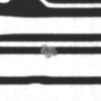

In [49]:
# 구간별 실행

from PIL import Image
import matplotlib.pyplot as plt  # 새 창 안띄우고 그래프 실행
import numpy as np

path = data_paths[0]
image_pil = Image.open(path)
print('size :',image_pil.size)
image_pil


In [54]:
image_num = np.array(image_pil)   # image 를 숫자로 변환
image_num.shape

(101, 101)

crop size : (100, 100)


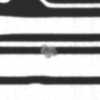

In [75]:
cropImage = image_pil.crop((0, 0, 100, 100)) # image 자르기 및 확인
print('crop size :',cropImage.size)
cropImage

In [71]:
# 파일 경로 설정 저장
save_path = 'Dataset/KSEM_HDI_AOI_origin2/Before2'
filename = os.path.basename(path)
filename2 = os.path.splitext(filename)[0]+'_resized.tif'
save_img = os.path.join(save_path,filename2)
save_img
cropImage.save(save_img)

'00019D25-3C1C-4A03-ACA8-095F19DE8803$TRUE$FALSE$FALSE$378.528$70.392$SHORT$NODE_PCB_EPOXY_THIN$SPACE_FOREIGN_OBJ$DEFECT$TRAINING_resized.tif'

In [77]:
cropImage.save(save_img) # 파일 저장

In [6]:
# 이미지 불러서 90, 180, 270, 돌려서 뻥튀기 하고 저장하기 1 - 경로확인

from PIL import Image
import matplotlib.pyplot as plt  # 새 창 안띄우고 그래프 실행
import numpy as np

data_paths = glob('Dataset/22_AOI_HDI_dim1_Gvis_Bin1/Train/Good/*.jpg')
len(data_paths), data_paths[0]


(2361,
 'Dataset/22_AOI_HDI_dim1_Gvis_Bin1/Train/Good\\201_양품-L9P_M8103004904_1_195_VRS0_AOI7_Defect.jpg')

In [82]:
# 이미지 4배 뻥튀기 : 불러서 90, 180, 270, 돌려서 뻥튀기 하고 저장하기 2 - 돌리고 저장하기

for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    
    image90 = image_pil.rotate(90)
    image180 = image_pil.rotate(180)
    image270 = image_pil.rotate(-90)
    
    save_path = os.path.dirname(path)        
    filename = os.path.basename(path)

    filename90 = os.path.splitext(filename)[0]+'_90.jpg'
    save_img90 = os.path.join(save_path,filename90)
    image90.save(save_img90)
    
    filename180 = os.path.splitext(filename)[0]+'_180.jpg'
    save_img180 = os.path.join(save_path,filename180)
    image180.save(save_img180)
    
    filename270 = os.path.splitext(filename)[0]+'_270.jpg'
    save_img270 = os.path.join(save_path,filename270)
    image270.save(save_img270)

In [7]:
# 이미지 3배 뻥튀기 : 불러서 90, 270, 돌려서 뻥튀기 하고 저장하기 2 - 돌리고 저장하기

for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    
    image90 = image_pil.rotate(90)
#    image180 = image_pil.rotate(180)
    image270 = image_pil.rotate(-90)
    
    save_path = os.path.dirname(path)        
    filename = os.path.basename(path)

    filename90 = os.path.splitext(filename)[0]+'_90.jpg'
    save_img90 = os.path.join(save_path,filename90)
    image90.save(save_img90)
    
#     filename180 = os.path.splitext(filename)[0]+'_180.jpg'
#     save_img180 = os.path.join(save_path,filename180)
#     image180.save(save_img180)
    
    filename270 = os.path.splitext(filename)[0]+'_270.jpg'
    save_img270 = os.path.join(save_path,filename270)
    image270.save(save_img270)